# Brain Classification 

# Imports

In [1]:
## Imported variables required for the classification models 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import plot_tree
from sklearn import tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

# Extensive EDA

In [2]:
## Import the file and read it 
brain = pd.read_csv(r'C:\Users\PavanithPushpanandar\Downloads\brain_stroke.csv')

In [3]:
brain

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0


In [4]:
## SOme of the data is already in text so need to encode for classification model
brain.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [5]:
brain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [6]:
### No values are null atm so no columns need to be deleted or filled for null.
brain.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [7]:

brain.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


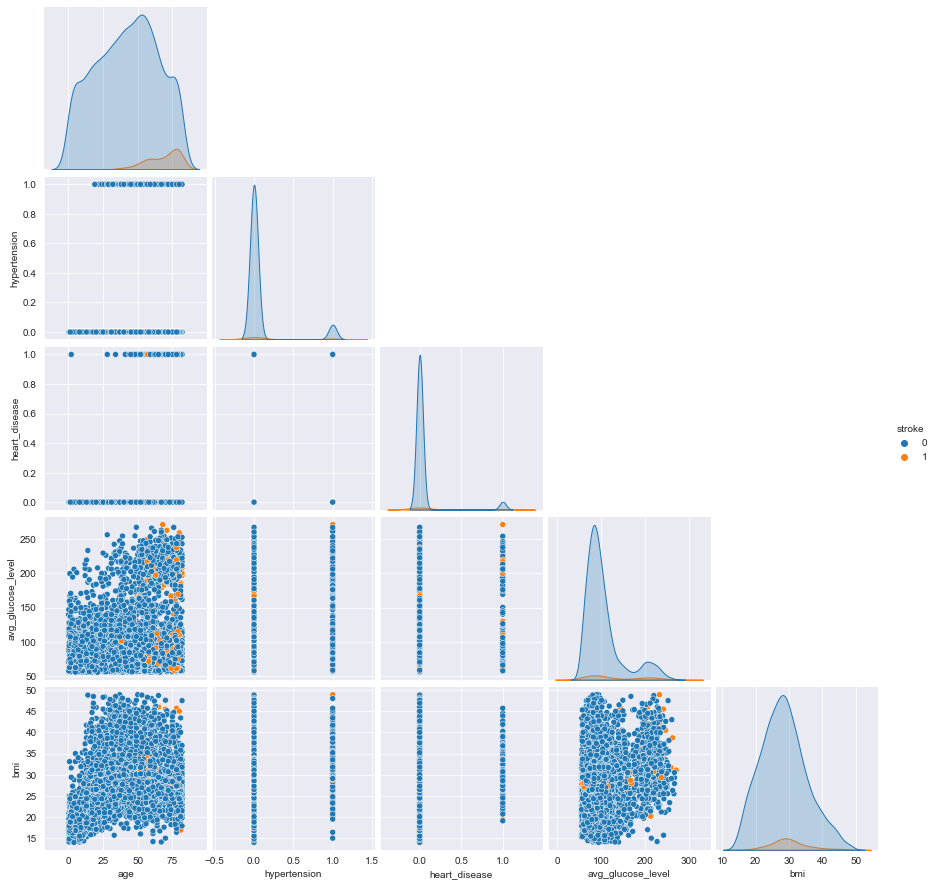

In [8]:
# Visual representation of the plots 
sns.pairplot(data=brain ,hue ="stroke", corner=True)

In [9]:
# Since stroke is target variable check how many ones and 0s there are for future classification model creation

yes = len(brain.loc[brain['stroke'] == 1, :])

no = len(brain.loc[brain['stroke'] == 0, :])

print('1', yes, '0', no)

yes/(yes+no)

1 248 0 4733


0.049789198956032926

In [10]:
##Explore the target variable 

a=brain['stroke'].tolist()
print(a)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [11]:
#Label encode the values and change d type to category 
brain['gender'] = brain['gender'].replace({'Male':0,'Female':1,'Other':-1}).astype("category")
brain['Residence_type'] = brain['Residence_type'].replace({'Rural':0,'Urban':1}).astype("category")
brain['work_type'] = brain['work_type'].replace({'Private':0,'Self-employed':1,'Govt_job':2,'children':-1,'Never_worked':-2}).astype("category")


In [12]:
brain['ever_married'] = brain['ever_married'].replace({'Yes':1,'No':0}).astype("category")
brain['smoking_status'] = brain['smoking_status'].replace({'smokes':1,'never smoked':0,'formerly smoked':2,'Unknown':-1}).astype("category")

In [13]:
brain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   gender             4981 non-null   category
 1   age                4981 non-null   float64 
 2   hypertension       4981 non-null   int64   
 3   heart_disease      4981 non-null   int64   
 4   ever_married       4981 non-null   category
 5   work_type          4981 non-null   category
 6   Residence_type     4981 non-null   category
 7   avg_glucose_level  4981 non-null   float64 
 8   bmi                4981 non-null   float64 
 9   smoking_status     4981 non-null   category
 10  stroke             4981 non-null   int64   
dtypes: category(5), float64(3), int64(3)
memory usage: 258.7 KB


In [14]:
brain

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,1,0,1,228.69,36.6,2,1
1,0,80.0,0,1,1,0,0,105.92,32.5,0,1
2,1,49.0,0,0,1,0,1,171.23,34.4,1,1
3,1,79.0,1,0,1,1,0,174.12,24.0,0,1
4,0,81.0,0,0,1,0,1,186.21,29.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,0,41.0,0,0,0,0,0,70.15,29.8,2,0
4977,0,40.0,0,0,1,0,1,191.15,31.1,1,0
4978,1,45.0,1,0,1,2,0,95.02,31.8,1,0
4979,0,40.0,0,0,1,0,0,83.94,30.0,1,0


In [15]:
## Stroke is our target variable so y iloc would be -1 and X is the rest of the columns apart from the stroke variable
X = brain.iloc[:,0:-1]
y = brain.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state = 45)

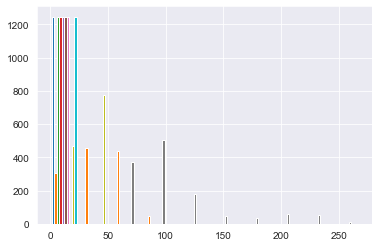

In [16]:


plt.hist(X_test);

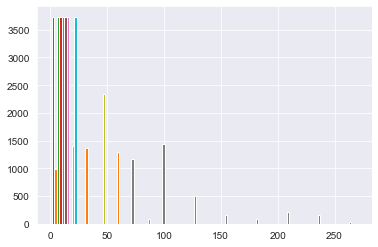

In [17]:


plt.hist(X_train);

In [18]:
##Decided to standardise as I want stroke to have only a 0 and 1 value when there is a mean and standard deviation 
from sklearn.preprocessing import StandardScaler

In [19]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [20]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
X_train, X_test

(array([[ 0.83714973,  1.53607208, -0.31697227, ..., -1.0494213 ,
         -0.64756185, -1.14624   ],
        [ 0.83714973,  0.38471054, -0.31697227, ..., -0.20681567,
         -0.08877991, -1.14624   ],
        [ 0.83714973,  1.40322267, -0.31697227, ..., -0.68110979,
          1.35228931, -0.19886085],
        ...,
        [-1.19452944,  1.62463835,  3.1548501 , ...,  1.50642405,
          0.42588767,  1.69589747],
        [-1.19452944, -1.47518117, -0.31697227, ...,  0.03471084,
         -1.91217362, -1.14624   ],
        [ 0.83714973, -0.67808472, -0.31697227, ...,  0.10456302,
         -1.39750604,  0.74851831]]),
 array([[ 0.86744528,  0.97234949, -0.35291463, ..., -0.03614479,
          1.01047108,  1.72994641],
        [-1.15281046,  1.05971923, -0.35291463, ...,  2.62675702,
         -0.39742785, -1.12377807],
        [ 0.86744528,  0.09865208, -0.35291463, ..., -0.67171261,
          1.26241088,  1.72994641],
        ...,
        [-1.15281046,  1.05971923, -0.35291463, ..., -

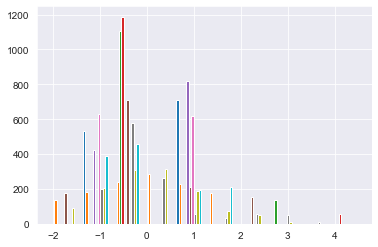

In [21]:
## follows a gaussian model model now 
plt.hist(X_test);

In [22]:
brain.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

Counter({0: 248, 1: 248})


(array([248.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 248.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

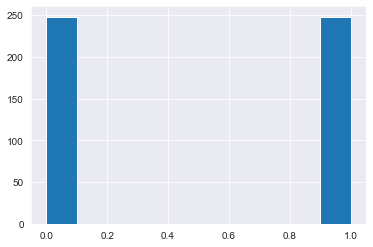

In [23]:
## Undersample as there is an imbalance with the data 

from imblearn.under_sampling import RandomUnderSampler
import imblearn
from collections import Counter
from sklearn.datasets import make_classification
import numpy as np

# define oversampling strategy

undersample = RandomUnderSampler(sampling_strategy='majority')
# fit and apply the transform
X_under, y_under =undersample.fit_resample(X, y)
# summarize class distribution
print(Counter(y_under))

X_train, X_test, y_train, y_test = train_test_split(X_under,y_under, test_size=0.25, random_state = 45)
plt.hist(y_under)



In [24]:
## Labeleed which one is which for model creation
X_under=brain[['gender', 'age', 'hypertension', 'heart_disease', 'ever_married','work_type', 'Residence_type', 'avg_glucose_level', 'bmi','smoking_status']]
y_under=brain[['stroke']]

# KNN

In [25]:
# Calculate k
import math
math.sqrt(len(y_test))


11.135528725660043

In [26]:
from sklearn.neighbors import KNeighborsClassifier

# Create KNN Object
classifier = KNeighborsClassifier(n_neighbors = 11,metric='euclidean')


# Train model
classifier.fit(X_train,y_train)
classifier

KNeighborsClassifier(metric='euclidean', n_neighbors=11)

In [27]:
y_pred = classifier.predict(X_test)
y_pred, y_test

(array([1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
        0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
        1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
        0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
        0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
        1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0], dtype=int64),
 292    1
 266    1
 108    0
 409    1
 180    0
       ..
 13     0
 487    1
 280    1
 122    0
 20     0
 Name: stroke, Length: 124, dtype: int64)

In [28]:
# Confusion Matrix
confusion_matrix(y_test, y_pred)

array([[36, 22],
       [16, 50]], dtype=int64)

In [29]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
print(f1_score(y_test,y_pred))

0.7246376811594203


In [30]:
print(accuracy_score(y_test,y_pred))

0.6935483870967742


In [31]:
##This is to plot the error rate graph

error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    
error_rate

[0.31451612903225806,
 0.3387096774193548,
 0.24193548387096775,
 0.25806451612903225,
 0.25806451612903225,
 0.2661290322580645,
 0.25806451612903225,
 0.27419354838709675,
 0.2903225806451613,
 0.28225806451612906,
 0.3064516129032258,
 0.28225806451612906,
 0.2903225806451613,
 0.2903225806451613,
 0.3064516129032258,
 0.29838709677419356,
 0.3064516129032258,
 0.3064516129032258,
 0.29838709677419356,
 0.3064516129032258,
 0.29838709677419356,
 0.2903225806451613,
 0.28225806451612906,
 0.28225806451612906,
 0.2903225806451613,
 0.29838709677419356,
 0.29838709677419356,
 0.29838709677419356,
 0.3064516129032258,
 0.3064516129032258,
 0.3064516129032258,
 0.31451612903225806,
 0.2903225806451613,
 0.3064516129032258,
 0.2903225806451613,
 0.28225806451612906,
 0.28225806451612906,
 0.2903225806451613,
 0.29838709677419356]

Text(0, 0.5, 'Error Rate')

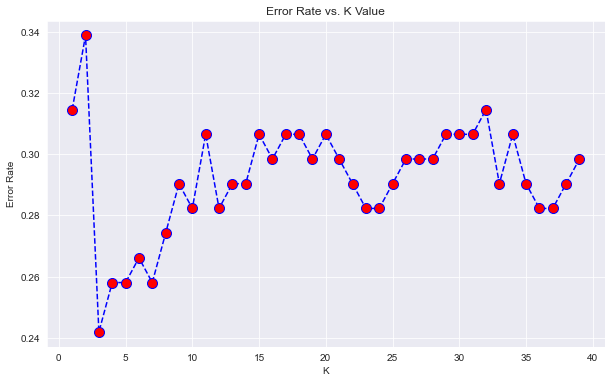

In [32]:
# Plot error graph

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [33]:
## Plot classification report


print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.69      0.62      0.65        58
           1       0.69      0.76      0.72        66

    accuracy                           0.69       124
   macro avg       0.69      0.69      0.69       124
weighted avg       0.69      0.69      0.69       124



In [49]:
## PLot confusion matrix

from sklearn.metrics import classification_report, confusion_matrix
confusion_matrix(y_test, y_pred)

array([[36, 22],
       [16, 50]], dtype=int64)

# Decision tree

In [35]:
## Check length of variables
len(X) , len(X_train) , len(X_test) , len(y_train) , len(y_test)

(4981, 372, 124, 372, 124)

In [36]:

#import for decision treee classification
from sklearn.tree import DecisionTreeClassifier
    

In [37]:
#train classifier
dtree = DecisionTreeClassifier()
dtree

DecisionTreeClassifier()

In [38]:
#fit model
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [39]:
# get predicted value
pred = dtree.predict(X_test)
pred 
list(zip(pred, y_test))

[(1, 1),
 (1, 1),
 (1, 0),
 (1, 1),
 (0, 0),
 (1, 1),
 (0, 1),
 (1, 1),
 (1, 1),
 (0, 0),
 (1, 1),
 (0, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (0, 1),
 (0, 0),
 (1, 1),
 (0, 1),
 (1, 0),
 (1, 0),
 (0, 1),
 (1, 1),
 (0, 0),
 (1, 0),
 (0, 0),
 (0, 0),
 (1, 0),
 (0, 0),
 (0, 1),
 (0, 1),
 (1, 1),
 (0, 0),
 (0, 0),
 (1, 1),
 (1, 1),
 (0, 0),
 (1, 1),
 (1, 1),
 (0, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (1, 1),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 1),
 (1, 1),
 (0, 0),
 (0, 1),
 (0, 0),
 (0, 1),
 (0, 0),
 (1, 1),
 (0, 0),
 (1, 1),
 (0, 1),
 (1, 0),
 (1, 1),
 (1, 0),
 (0, 1),
 (1, 1),
 (0, 0),
 (1, 0),
 (0, 0),
 (1, 1),
 (0, 1),
 (1, 1),
 (1, 1),
 (0, 0),
 (1, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (1, 0),
 (0, 1),
 (0, 0),
 (1, 1),
 (1, 1),
 (1, 1),
 (0, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (1, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (1, 0),
 (1, 0),
 (1, 1),
 (1, 0),
 (0, 1),
 (0, 1),
 (1, 1),
 (1, 0),
 (1, 0),
 (0, 0),
 (0, 0),
 (0, 1),
 (1, 1),
 (1, 0),
 (0, 0),
 (1, 1),
 

In [40]:
# get report for f1 score,recall,recission and accuracey value
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.66      0.69      0.67        58
           1       0.71      0.68      0.70        66

    accuracy                           0.69       124
   macro avg       0.69      0.69      0.68       124
weighted avg       0.69      0.69      0.69       124



In [48]:

## Confusion matriz
from sklearn.metrics import classification_report, confusion_matrix
confusion_matrix(y_test, pred)

array([[40, 18],
       [21, 45]], dtype=int64)

# Random forest

In [43]:
rf = RandomForestClassifier(n_jobs=2, random_state=42)
# training classifier
rf.fit(X_train,y_train)

RandomForestClassifier(n_jobs=2, random_state=42)

In [44]:
pred_rf = rf.predict(X_test)
list(zip(pred_rf, y_test))

[(1, 1),
 (1, 1),
 (1, 0),
 (1, 1),
 (0, 0),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (0, 0),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (0, 1),
 (0, 0),
 (1, 1),
 (1, 1),
 (1, 0),
 (1, 0),
 (0, 1),
 (1, 1),
 (0, 0),
 (1, 0),
 (0, 0),
 (0, 0),
 (1, 0),
 (1, 0),
 (0, 1),
 (1, 1),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 1),
 (0, 1),
 (0, 0),
 (1, 1),
 (1, 1),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (1, 1),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (1, 1),
 (1, 1),
 (0, 0),
 (1, 1),
 (1, 0),
 (0, 1),
 (0, 0),
 (1, 1),
 (0, 0),
 (1, 1),
 (1, 1),
 (1, 0),
 (1, 1),
 (1, 0),
 (1, 1),
 (1, 1),
 (0, 0),
 (1, 0),
 (0, 0),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (0, 0),
 (1, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (1, 0),
 (1, 1),
 (0, 0),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (0, 0),
 (1, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (1, 0),
 (1, 0),
 (1, 1),
 (1, 0),
 (1, 1),
 (1, 1),
 (0, 1),
 (1, 0),
 (1, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (1, 1),
 (1, 0),
 (0, 0),
 (1, 1),
 

In [45]:
## Print classification report

print(classification_report(y_test, pred_rf))

              precision    recall  f1-score   support

           0       0.81      0.66      0.72        58
           1       0.74      0.86      0.80        66

    accuracy                           0.77       124
   macro avg       0.77      0.76      0.76       124
weighted avg       0.77      0.77      0.76       124



In [46]:
## Print confusion matrix 

from sklearn.metrics import classification_report, confusion_matrix
confusion_matrix(y_test, pred_rf)

array([[38, 20],
       [ 9, 57]], dtype=int64)

# Conclusion 

In [ ]:
## From the results based on the f1 score  I would say that the Rnadom Forest is the best classification model as it has the highest f1 score and the R squared value 